In [19]:
import random

class Easy21:
    """
    Be really strict with your implementation relative to the problem criteria 
    """
    def __init__(self, player_threshold=16):
        self.dealer_score, self.player_score = random.choice(list(range(1,11))), random.choice(list(range(1,11)))
        self.terminated = False
        self.reward = 0
        
    def evaluate_winner(self):
        if self.player_score < 1 or self.player_score > 21:
            self.reward = -1
        elif self.dealer_score == self.player_score:
            self.reward = 0
        else:
            self.reward = 1 if self.player_score > self.dealer_score else -1
            
    def update(self, score):
        "Update the state wrt one character"
        colour = random.choice([-1,1,1])
        card = random.choice(list(range(1,11)))
        new_score = score + (colour * card)
        if (new_score > 21 or new_score < 1):
            self.terminated = True
            return new_score
        else:
            return new_score
        
    def play_out_dealer(self):
        "Terminate the game and retrieve the dealer's score"
        if self.reward != -1 and self.terminated == False:
            while self.dealer_score <= 16 and self.dealer_score >= 1: 
                self.dealer_score = self.update(self.dealer_score)
                
        self.terminated = True
        self.evaluate_winner()
        return self.reward, self.dealer_score, self.player_score
    
    def step(self, player_score, dealer_score, action):
        if action == 1:
            self.player_score = self.update(self.player_score)
        else:
            self.play_out_dealer()
        return self.player_score, self.dealer_score, self.reward, self.terminated
    

In [20]:
import numpy as np

print_every = 100
actions = [0,1]
N0 = 100

# state, action function
Q = np.zeros((22,11,len(actions)))

# number of times action a has been chosen in state s
NSA = np.zeros((22,11,len(actions)))

# number of times state s has been visited
def NS(p, d):
    return np.sum(NSA[p,d])

# step size
def alpha(p, d, a):
    return 1 / NSA[p, d, a]

# exploration probability
def epsilon(p, d):
    return N0 / (N0 + NS(p, d))

def epsilon_greedy(p, d):
    if np.random.random() < epsilon(p, d):
        action = np.random.choice(actions)
    else:
        action = np.argmax([Q[p, d, a] for a in actions])
    return action


episodes = int(3e5)
mean_return = 0
wins = 0

for episode in range(episodes):
    terminated = False
    SAR = list()
    env = Easy21()
    while env.terminated == False:
        a = epsilon_greedy(env.player_score, env.dealer_score)
        p, d = env.player_score, env.dealer_score
        NSA[env.player_score, env.dealer_score, a] += 1
        p_prime, d_prime, r, terminated = env.step(env.player_score, env.dealer_score, a)
        SAR.append([p, d, a, r])
        env.player_score, env.dealer_scor = p_prime, d_prime
        
    G = sum([sar[-1] for sar in SAR])
    for (p, d, a, _) in SAR:
        Q[p, d, a] += alpha(p, d, a) * (G - Q[p, d, a])
        
    mean_return = mean_return + 1/(episode + 1) * (G - mean_return)
    if r == 1:
        wins += 1
        
    episode_list, mean_returns, win_list = [], [], []
    if episode % 10000 == 0:
        print(episode, mean_return)
        episode_list.append(episode)
        mean_returns.append(mean_return)

0 -1.0
10000 -0.15878412158784078
20000 -0.11524423778811056
30000 -0.08599713342888624
40000 -0.062173445663859274
50000 -0.04495910081798415
60000 -0.029232846119231697
70000 -0.017342609391294853
80000 -0.004337445781928125
90000 0.00658881567982544
100000 0.01663983360166361
110000 0.024736138762374522
120000 0.031641402988308094
130000 0.03802278444011961
140000 0.043228262655266796
150000 0.0484996766688228
160000 0.05358091511928137
170000 0.05820553996741284
180000 0.061894100588330885
190000 0.06517860432313592
200000 0.0677946610266954
210000 0.07089966238256065
220000 0.07344512070399739
230000 0.07606488667440693
240000 0.07832884029649989
250000 0.08056767772928984
260000 0.08256122091838111
270000 0.08438116895863342
280000 0.08621040639140543
290000 0.08792383474539726


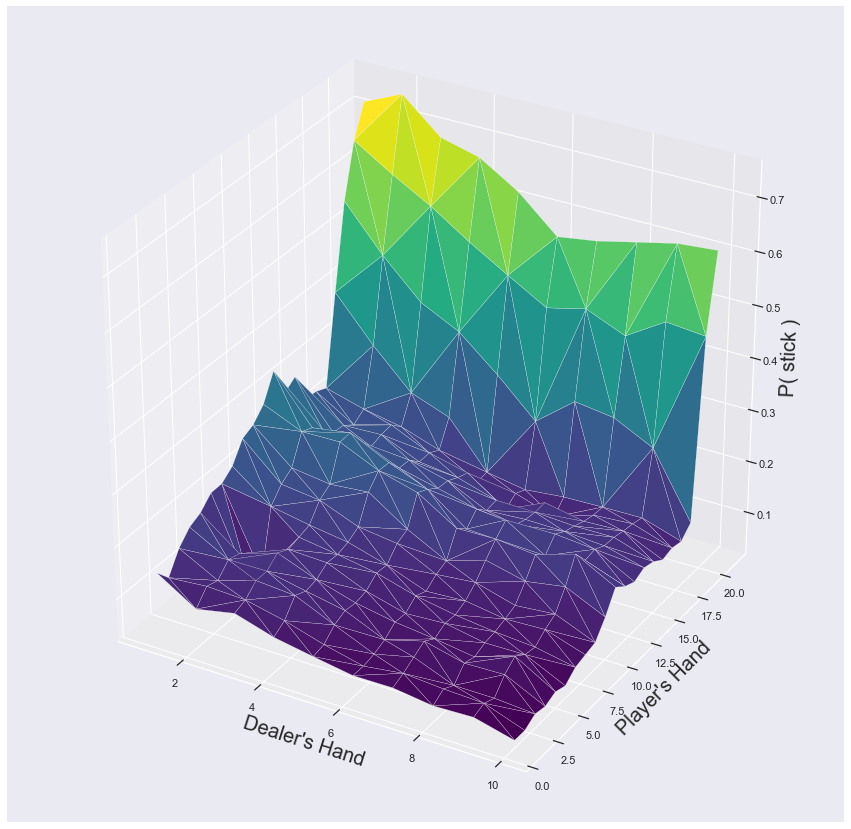

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()

def plot(Q, actions):
    p_range = list(range(1,22))
    d_range = list(range(1,11))
    v_star = list()
    for p in p_range:
        for d in d_range:
            v_star.append([p, d, np.max([Q[p, d, a] for a in actions])])
            
    df = pd.DataFrame(v_star, columns=['player','dealer','value'])
    
    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['dealer'], df['player'], df['value'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_xlabel("Dealer's Hand", fontsize=20)
    ax.set_ylabel("Player's Hand", fontsize=20)
    ax.set_zlabel("P( stick )", fontsize=20)
    #fig.colorbar(surf, shrink=0.5, aspect = 5)
    plt.show()
    
plot(Q, [0,1])
    
    